## GD:04 - > DTM, TF-IDF VOCABULARY SIZE
###   reuters news classification

<br> 

### 1. Num_words: 10000

### 2. Num_words: 5000 

### 3. Num_words: None

### 4. RNN

### 5. 1DCNN

In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 1. Num_words = 10000

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [ ]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


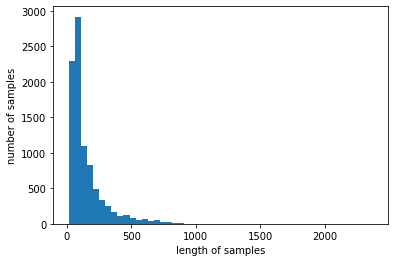

In [ ]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [ ]:
word_index['the']

1

In [ ]:
index_to_word = {index+3 : word for word, index in word_index.items()}

In [ ]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [ ]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

In [ ]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
print(' '.join([index_to_word[index] for index in [4, 12000, 23, 133, 6, 30, 515]
]))

the staffing is expected to be completed


In [ ]:
decoded = []
for i in range(len(x_train)):
  t = ' '.join([index_to_word[index] for index in x_train[i]])
  decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [ ]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


In [ ]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

In [ ]:
x_test_dtm = dtmvector.transform(x_test)
tfidfv_test = tfidf_transformer.transform(x_test_dtm) 

In [ ]:
def train_ml(tfidfv, y_train, tfidfv_test, y_test):

  #Naive Bayse classification
  nbc_model = MultinomialNB()
  nbc_model.fit(tfidfv, y_train)
  nbc_predicted = nbc_model.predict(tfidfv_test)
  print("나이브 베이즈 정확도:", accuracy_score(y_test, nbc_predicted))

  #CNB

  cb = ComplementNB()
  cb.fit(tfidfv, y_train)
  cb_predicted = cb.predict(tfidfv_test)
  print("CNB 정확도:", accuracy_score(y_test, cb_predicted))

  #Logistic regression
  lr = LogisticRegression(C=10000, penalty='l2')
  lr.fit(tfidfv, y_train)

  lr_predicted = lr.predict(tfidfv_test)
  print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted))

  #Svm

  svc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
  svc.fit(tfidfv, y_train)
  svc_predicted = svc.predict(tfidfv_test)
  print('SVM 정확도:', accuracy_score(y_test, svc_predicted))

  #결정 트리

  tree = DecisionTreeClassifier(max_depth=10, random_state=0)
  tree.fit(tfidfv, y_train)
  tree_predicted = tree.predict(tfidfv_test)
  print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted))

  # 그래디언트 부스팅 트리
  grbt = GradientBoostingClassifier(random_state=0)
  grbt.fit(tfidfv, y_train)

  grbt_predicted = grbt.predict(tfidfv_test) 
  print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted)) 

  #랜덤 포레스트

  forest = RandomForestClassifier(n_estimators=5, random_state=0)
  forest.fit(tfidfv, y_train)
  rf_predicted = forest.predict(tfidfv_test)
  print("랜덤 포레스트 정확도:", accuracy_score(y_test, rf_predicted))

  #보팅
  voting_model = VotingClassifier(estimators=[('lr', LogisticRegression(C=10000, penalty='l2')), ('cnb', ComplementNB()), ('grbt', GradientBoostingClassifier(random_state=0))], voting='soft')
  voting_model.fit(tfidfv, y_train)

  voting_model_predicted = voting_model.predict(tfidfv_test)
  print("보팅 정확도", accuracy_score(y_test, voting_model_predicted))

  return nbc_model, cb, lr, svc, tree, grbt, forest, voting_model

In [ ]:
nbc_model, cb, lr, svc, tree, grbt, forest, voting_model = train_ml(tfidfv, y_train, tfidfv_test, y_test)

나이브 베이즈 정확도: 0.6567230632235085
CNB 정확도: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8076580587711487


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVM 정확도: 0.7715939447907391
결정 트리 정확도: 0.6202137132680321
그래디언트 부스팅 트리 정확도: 0.7666963490650045
랜덤 포레스트 정확도: 0.674087266251113


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


보팅 정확도 0.8121104185218165


# Num_words = 10000 / Accuracy

- 나이브 베이즈 정확도: 0.6567230632235085
- CNB 정확도: 0.7707034728406055
- 로지스틱 회귀 정확도: 0.8076580587711487
-SVM 정확도: 0.7715939447907391
- 결정 트리 정확도: 0.6202137132680321
- 그래디언트 부스팅 트리 정확도: 0.7666963490650045
- 랜덤 포레스트 정확도: 0.674087266251113
- 보팅 정확도 0.8121104185218165



## Num_words 5000

In [ ]:
(x_train_5k, y_train_5k), (x_test_5k, y_test_5k) = reuters.load_data(num_words=5000, test_split=0.2)

In [ ]:
decoded = []
for i in range(len(x_train_5k)):
  t = ' '.join([index_to_word[index] for index in x_train_5k[i]])
  decoded.append(t)

x_train_5k = decoded

print(len(x_train_5k))

8982


In [ ]:
decoded = []
for i in range(len(x_test_5k)):
    t = ' '.join([index_to_word[index] for index in x_test_5k[i]])
    decoded.append(t)

x_test_5k = decoded
print(len(x_test_5k))

2246


In [ ]:
dtmvector = CountVectorizer()
x_train5k_dtm = dtmvector.fit_transform(x_train_5k)
print(x_train5k_dtm.shape)

(8982, 4867)


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv_5k = tfidf_transformer.fit_transform(x_train5k_dtm)
print(tfidfv_5k.shape)

(8982, 4867)


In [ ]:
x_test_dtm_5k = dtmvector.transform(x_test_5k) #테스트 데이터를 DTM으로 변환
tfidfv_test_5k = tfidf_transformer.transform(x_test_dtm_5k) #DTM을 TF-IDF 행렬로 변환

In [ ]:
nbc_model, cb, lr, svc, tree, grbt, forest, voting_model = train_ml(tfidfv_5k, y_train_5k, tfidfv_test_5k, y_test_5k)

나이브 베이즈 정확도: 0.6731967943009796
CNB 정확도: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8058771148708815


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVM 정확도: 0.7649154051647373
결정 트리 정확도: 0.6179875333926982
그래디언트 부스팅 트리 정확도: 0.7671415850400712
랜덤 포레스트 정확도: 0.701246660730187


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


보팅 정확도 0.8161175422974176


# Num_words : 5000  / Accuracy

- 나이브 베이즈 정확도: 0.6731967943009796
- CNB 정확도: 0.7707034728406055
- 로지스틱 회귀 정확도: 0.8058771148708815
-SVM 정확도: 0.7649154051647373
- 결정 트리 정확도: 0.6179875333926982
- 그래디언트 부스팅 트리 정확도: 0.7671415850400712
- 랜덤 포레스트 정확도: 0.701246660730187
- 보팅 정확도 0.8161175422974176


## Num_words 모든 단어 사용

In [ ]:
(x_train_none, y_train_none), (x_test_none, y_test_none) = reuters.load_data(num_words=None, test_split=0.2)

In [ ]:
decoded = []
for i in range(len(x_train_none)):
  t = ' '.join([index_to_word[index] for index in x_train_none[i]])
  decoded.append(t)

x_train_none = decoded

print(len(x_train_none))

8982


In [ ]:
decoded = []
for i in range(len(x_test_none)):
    t = ' '.join([index_to_word[index] for index in x_test_none[i]])
    decoded.append(t)

x_test_none = decoded
print(len(x_test_none))

2246


In [ ]:
dtmvector = CountVectorizer()
x_train_none_dtm = dtmvector.fit_transform(x_train_none)
print(x_train_none_dtm.shape)

(8982, 26506)


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv_none = tfidf_transformer.fit_transform(x_train_none_dtm)
print(tfidfv_none.shape)

(8982, 26506)


In [ ]:
x_test_dtm_none = dtmvector.transform(x_test_none) #테스트 데이터를 DTM으로 변환
tfidfv_test_none = tfidf_transformer.transform(x_test_dtm_none) #DTM을 TF-IDF 행렬로 변환

In [ ]:
nbc_model, cb, lr, svc, tree, grbt, forest, voting_model  = train_ml(tfidfv_none, y_train_none, tfidfv_test_none, y_test_none)

나이브 베이즈 정확도: 0.5997328584149599
CNB 정확도: 0.7649154051647373


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.813446126447017


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVM 정확도: 0.7782724844167409
결정 트리 정확도: 0.6211041852181657
그래디언트 부스팅 트리 정확도: 0.7666963490650045
랜덤 포레스트 정확도: 0.6544968833481746


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


보팅 정확도 0.8183437221727515


# Num_words : 10000  / Accuracy
- 나이브 베이즈 정확도 : 0.5997328584149599
- CNB 정확도: 0.7649154051647373
- 로지스틱 회귀 정확도: 0.813446126447017
- SVM 정확도: 0.7782724844167409
- 결정 트리 정확도: 0.6211041852181657
- 그래디언트 부스팅 트리 정확도: 0.7666963490650045
- 랜덤 포레스트 정확도: 0.6544968833481746
- 보팅 정확도 0.8183437221727515




##RNN

In [ ]:
from tensorflow import keras
from tensorflow.keras import Input, Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
tfidfv_none_arr = tfidfv_none.toarray()
tfidfv_test_none_arr = tfidfv_test_none.toarray()

In [ ]:
y_train_none.shape

(8982,)

In [ ]:
vocab_size = 20000
word_vector_dim = 32  
num_classes = 46

LSTM_MODEL = keras.Sequential()
LSTM_MODEL.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim))
LSTM_MODEL.add(keras.layers.LSTM(32))
LSTM_MODEL.add(keras.layers.Dense(num_classes, activation='softmax'))  
LSTM_MODEL.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 46)                1518      
                                                                 
Total params: 649,838
Trainable params: 649,838
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

LSTM_MODEL.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            
epochs=5
batch_size=64

history = LSTM_MODEL.fit(tfidfv_none_arr,
                                y_train_none,
                                epochs=epochs,
                                batch_size=batch_size,
                                callbacks=[es],
                                validation_split=0.2,
                                verbose=1)

Epoch 1/5
113/113 [==============================] - 108s 941ms/step - loss: 2.7951 - accuracy: 0.3376 - val_loss: 2.4101 - val_accuracy: 0.3450
Epoch 2/5
113/113 [==============================] - 106s 936ms/step - loss: 2.4086 - accuracy: 0.3534 - val_loss: 2.4071 - val_accuracy: 0.3450
Epoch 3/5
113/113 [==============================] - 106s 935ms/step - loss: 2.4067 - accuracy: 0.3534 - val_loss: 2.4063 - val_accuracy: 0.3450
Epoch 4/5
113/113 [==============================] - 106s 941ms/step - loss: 2.4063 - accuracy: 0.3534 - val_loss: 2.4058 - val_accuracy: 0.3450
Epoch 5/5
113/113 [==============================] - 106s 942ms/step - loss: 2.4066 - accuracy: 0.3534 - val_loss: 2.4072 - val_accuracy: 0.3450


In [ ]:
results = LSTM_MODEL.evaluate(tfidfv_test_none_arr, y_test_none, verbose=2)
print(results)

71/71 - 24s - loss: 2.4151 - accuracy: 0.3620 - 24s/epoch - 342ms/step
[2.4151406288146973, 0.36197686195373535]


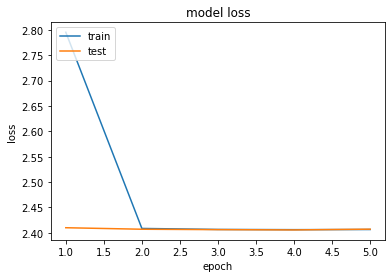

In [ ]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(y_test_none, LSTM_MODEL.predict(tfidfv_test_none_arr).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.36      1.00      0.53       813
           4       0.00      0.00      0.00       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Graph_confusion_matrix를 통한 해당 모델 시각화

In [ ]:
def graph_confusion_matrix(model, x_test, y_test):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test).argmax(axis=1)))
    fig = plt.figure(figsize=(15,15))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

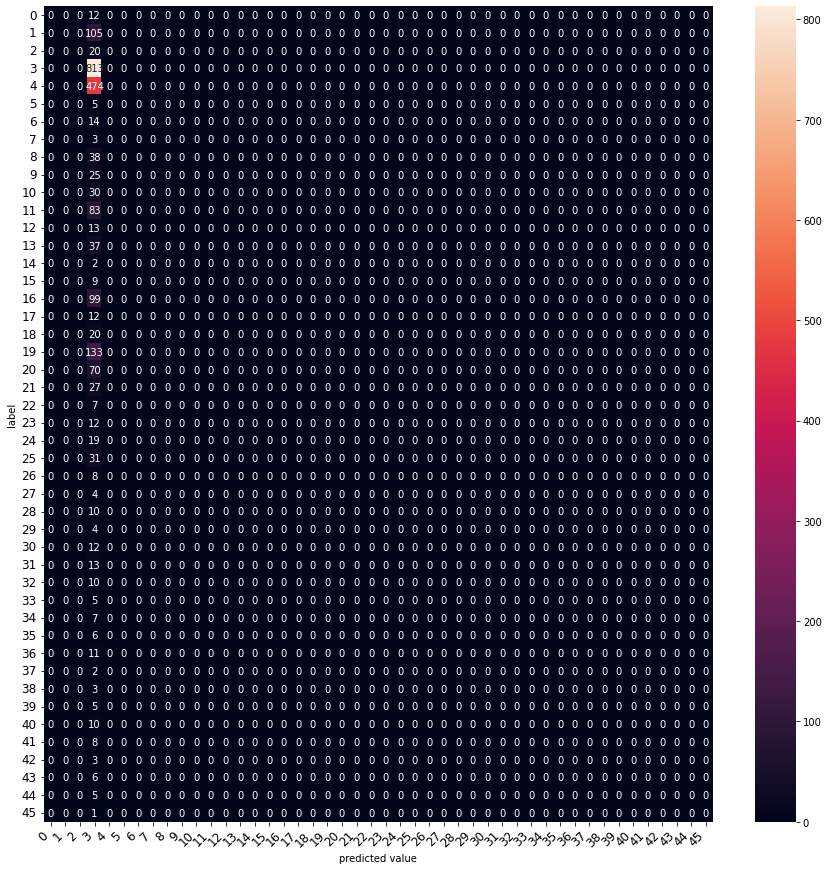

In [ ]:
graph_confusion_matrix(LSTM_MODEL,tfidfv_test_none_arr, y_test_none)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

## Num_words=10000을 기준으로 위와 동일한 모델구조를 짜서, 임베딩 대신에 pad_sequence, to_categorical한 Train_set을 넣어보자!

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [ ]:
max_len = 100

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, word_vector_dim))
model.add(LSTM(32))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          640000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 46)                1518      
                                                                 
Total params: 649,838
Trainable params: 649,838
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, batch_size=64, epochs=20, callbacks=[es, mc], validation_split=0.2, verbose=1)

Epoch 1/20
106/113 [===========================>..] - ETA: 0s - loss: 2.8181 - acc: 0.3443
Epoch 1: val_acc improved from -inf to 0.34502, saving model to best_model.h5
113/113 [==============================] - 3s 12ms/step - loss: 2.7918 - acc: 0.3442 - val_loss: 2.4056 - val_acc: 0.3450
Epoch 2/20
113/113 [==============================] - ETA: 0s - loss: 2.2622 - acc: 0.4134
Epoch 2: val_acc improved from 0.34502 to 0.49917, saving model to best_model.h5
113/113 [==============================] - 1s 8ms/step - loss: 2.2622 - acc: 0.4134 - val_loss: 2.0826 - val_acc: 0.4992
Epoch 3/20
109/113 [===========================>..] - ETA: 0s - loss: 1.9586 - acc: 0.5097
Epoch 3: val_acc improved from 0.49917 to 0.51308, saving model to best_model.h5
113/113 [==============================] - 1s 9ms/step - loss: 1.9584 - acc: 0.5090 - val_loss: 1.8069 - val_acc: 0.5131
Epoch 4/20
112/113 [============================>.] - ETA: 0s - loss: 1.7320 - acc: 0.5466
Epoch 4: val_acc did not improve

In [ ]:
results = model.evaluate(X_test, y_test, verbose=2)
print(results)

71/71 - 0s - loss: 1.6871 - acc: 0.6215 - 231ms/epoch - 3ms/step
[1.6871209144592285, 0.6215494275093079]


## 이때는 비교적 성능이 높게 나옴을 확인

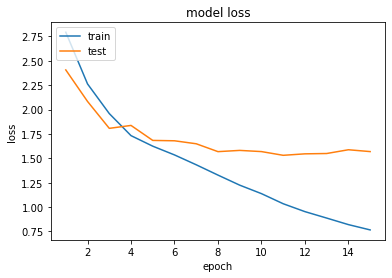

In [ ]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(classification_report(y_test_none, model.predict(X_test).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.42      0.53      0.47       105
           2       0.04      0.05      0.04        20
           3       0.89      0.89      0.89       813
           4       0.78      0.79      0.78       474
           5       0.00      0.00      0.00         5
           6       0.27      0.29      0.28        14
           7       0.00      0.00      0.00         3
           8       0.30      0.16      0.21        38
           9       0.10      0.08      0.09        25
          10       0.22      0.43      0.29        30
          11       0.24      0.49      0.33        83
          12       0.29      0.15      0.20        13
          13       0.16      0.14      0.14        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.38      0.55      0.44        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


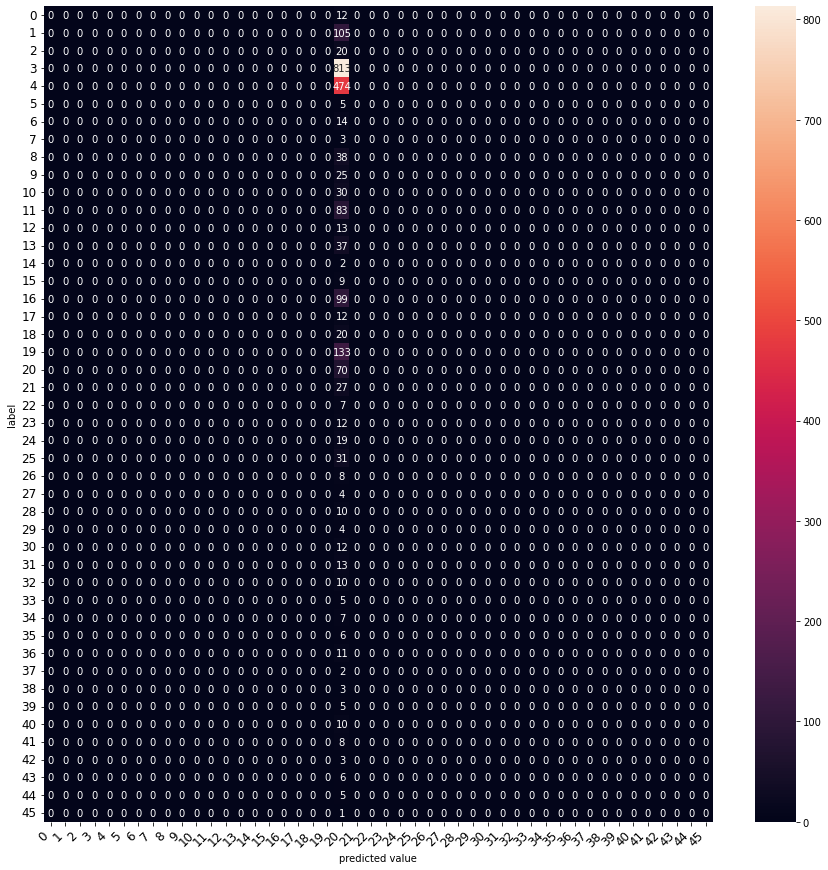

In [ ]:
graph_confusion_matrix(model,tfidfv_test_none_arr, y_test_none)

# Conv1D를 통한 tfidfv_arr에 대해 학습! 

In [ ]:
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense

vocab_size = 20000
word_vector_dim = 32  
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

cnn_model = Sequential()
cnn_model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim))
cnn_model.add(Dropout(dropout_ratio))
cnn_model.add(keras.layers.Conv1D(filters=num_filters, kernel_size=kernel_size, padding='valid', activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(hidden_units, activation='relu'))
cnn_model.add(Dropout(dropout_ratio))
cnn_model.add(keras.layers.Dense(num_classes, activation='softmax'))  
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          640000    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 conv1d (Conv1D)             (None, None, 256)         24832     
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = cnn_model.fit(tfidfv_none_arr,
                                y_train_none,
                                epochs=5,
                                batch_size=batch_size,
                                callbacks=[es,mc],
                                validation_split=0.2,                        
)

Epoch 1/5
113/113 [==============================] - ETA: 0s - loss: 2.6727 - acc: 0.3232
Epoch 1: val_acc improved from -inf to 0.34502, saving model to best_model.h5
113/113 [==============================] - 32s 270ms/step - loss: 2.6727 - acc: 0.3232 - val_loss: 2.5590 - val_acc: 0.3450
Epoch 2/5
113/113 [==============================] - ETA: 0s - loss: 2.4651 - acc: 0.3402
Epoch 2: val_acc did not improve from 0.34502
113/113 [==============================] - 30s 264ms/step - loss: 2.4651 - acc: 0.3402 - val_loss: 2.6116 - val_acc: 0.3450
Epoch 3/5
113/113 [==============================] - ETA: 0s - loss: 2.4417 - acc: 0.3471
Epoch 3: val_acc did not improve from 0.34502
113/113 [==============================] - 30s 266ms/step - loss: 2.4417 - acc: 0.3471 - val_loss: 2.5815 - val_acc: 0.3450
Epoch 4/5
113/113 [==============================] - ETA: 0s - loss: 2.4395 - acc: 0.3523
Epoch 4: val_acc did not improve from 0.34502
113/113 [==============================] - 30s 264ms

In [ ]:
results = cnn_model.evaluate(tfidfv_test_none_arr, y_test_none, verbose=2)
print(results)

71/71 - 2s - loss: 2.5795 - acc: 0.3620 - 2s/epoch - 34ms/step
[2.579521656036377, 0.36197686195373535]


In [ ]:
print(classification_report(y_test_none, cnn_model.predict(tfidfv_test_none_arr).argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00       105
           2       0.00      0.00      0.00        20
           3       0.36      1.00      0.53       813
           4       0.00      0.00      0.00       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


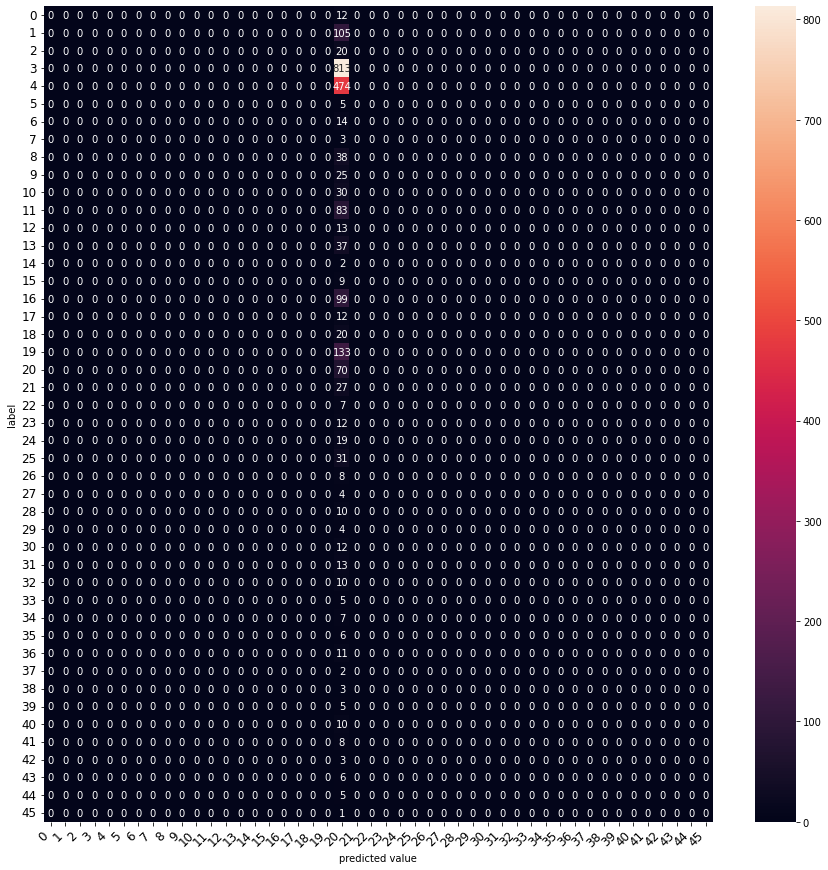

In [ ]:
graph_confusion_matrix(model,tfidfv_test_none_arr, y_test_none)

### 동일하게 CNN1D에 대해서 TF-IDF Embedding대신에 따로 전처리 과정을 거친 데이터셋에 대해 학습!

In [ ]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [ ]:
max_len = 100

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense

vocab_size = 10000
word_vector_dim = 32  
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

cnn_model = Sequential()
cnn_model.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim))
cnn_model.add(Dropout(dropout_ratio))
cnn_model.add(keras.layers.Conv1D(filters=num_filters, kernel_size=kernel_size, padding='valid', activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(hidden_units, activation='relu'))
cnn_model.add(Dropout(dropout_ratio))
cnn_model.add(keras.layers.Dense(num_classes, activation='softmax'))  
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 dropout_2 (Dropout)         (None, None, 32)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 256)         24832     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['acc'])
history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=batch_size, callbacks=[es,mc], validation_split=0.2, )

Epoch 1/5
105/113 [==========================>...] - ETA: 0s - loss: 1.0941 - acc: 0.7208
Epoch 1: val_acc improved from -inf to 0.68503, saving model to best_model.h5
113/113 [==============================] - 1s 7ms/step - loss: 1.0890 - acc: 0.7229 - val_loss: 1.2906 - val_acc: 0.6850
Epoch 2/5
107/113 [===========================>..] - ETA: 0s - loss: 0.9802 - acc: 0.7407
Epoch 2: val_acc improved from 0.68503 to 0.69004, saving model to best_model.h5
113/113 [==============================] - 1s 5ms/step - loss: 0.9860 - acc: 0.7404 - val_loss: 1.2893 - val_acc: 0.6900
Epoch 3/5
104/113 [==========================>...] - ETA: 0s - loss: 0.8794 - acc: 0.7670
Epoch 3: val_acc improved from 0.69004 to 0.69783, saving model to best_model.h5
113/113 [==============================] - 1s 6ms/step - loss: 0.8819 - acc: 0.7669 - val_loss: 1.2988 - val_acc: 0.6978
Epoch 4/5
108/113 [===========================>..] - ETA: 0s - loss: 0.7981 - acc: 0.7850
Epoch 4: val_acc improved from 0.6978

In [ ]:
results = cnn_model.evaluate(X_test, y_test, verbose=2)
print(results)

71/71 - 0s - loss: 1.3928 - acc: 0.6915 - 411ms/epoch - 6ms/step
[1.3927570581436157, 0.6914514899253845]


## 이것도 마찬가지로 0.69로 Accuracy가 기존의 임베딩보다 높게나옴을 확인!

### 회고

1. 왜 TF-IDF로 임베딩한 것은 성능이 낮게나오는 것에 대한 명확한 해답을 찾지 못함. 결국 TF-IDF가 임베딩의 역할도 마찬가지로 수행하고 있는 것인데, 이것에 대해 Keras의 Embedding을 해주면, 원래의 정보가 사라지는 것일까..? 

2. 아니라면 모델 자체가 해당 Task에 적합하지 않아서일 수도 있겠다!

3. 그럼에도 머신러닝이 오히려 '꽤' 괜찮은 성능을 보여준 것은 흥미로운데, 위와 같이 비교적 작은 데이터라면, 혹은 머신러닝이 필요한 어떠한 task라면 위의 모델을 통해 문제들을 풀어볼 수 있겠다.

4. 결국 해당 과제를 통해서 로이터 문제를 풀수있는 최적의 해답을 얻었다기 보다는, 여러 머신러닝 방법론들과, TF-IDF, DTM에 관한 것들 정도가 얻어갈 수 있는 것인듯 싶다.
